## Marriage Trends in India: Love vs. Arranged

## Import library and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
marriage_data=pd.read_csv("C:\\Users\\Ravindra\\Downloads\\marriage_data_india.csv")

In [3]:
marriage_data.head(4)

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No


## check data info & null values

In [4]:
marriage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Marriage_Type         10000 non-null  object
 2   Age_at_Marriage       10000 non-null  int64 
 3   Gender                10000 non-null  object
 4   Education_Level       10000 non-null  object
 5   Caste_Match           10000 non-null  object
 6   Religion              10000 non-null  object
 7   Parental_Approval     10000 non-null  object
 8   Urban_Rural           10000 non-null  object
 9   Dowry_Exchanged       10000 non-null  object
 10  Marital_Satisfaction  10000 non-null  object
 11  Divorce_Status        10000 non-null  object
 12  Children_Count        10000 non-null  int64 
 13  Income_Level          10000 non-null  object
 14  Years_Since_Marriage  10000 non-null  int64 
 15  Spouse_Working        10000 non-null 

In [5]:
marriage_data.isnull().sum()

ID                      0
Marriage_Type           0
Age_at_Marriage         0
Gender                  0
Education_Level         0
Caste_Match             0
Religion                0
Parental_Approval       0
Urban_Rural             0
Dowry_Exchanged         0
Marital_Satisfaction    0
Divorce_Status          0
Children_Count          0
Income_Level            0
Years_Since_Marriage    0
Spouse_Working          0
Inter-Caste             0
Inter-Religion          0
dtype: int64

In [6]:
m1_data=marriage_data.describe()
m1_data

,ID,Age_at_Marriage,Children_Count,Years_Since_Marriage
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,28.503800,2.508800,24.973800
std,2886.89568,6.279564,1.695467,14.054838
min,1.00000,18.000000,0.000000,1.000000
25%,2500.75000,23.000000,1.000000,13.000000
50%,5000.50000,29.000000,3.000000,25.000000
75%,7500.25000,34.000000,4.000000,37.000000
max,10000.00000,39.000000,5.000000,49.000000


In [7]:
marriage_data.shape

(10000, 18)

In [8]:
m1_data.columns

Index(['ID', 'Age_at_Marriage', 'Children_Count', 'Years_Since_Marriage'], dtype='object')

## Checking outlier

<Axes: xlabel='ID', ylabel='Density'>

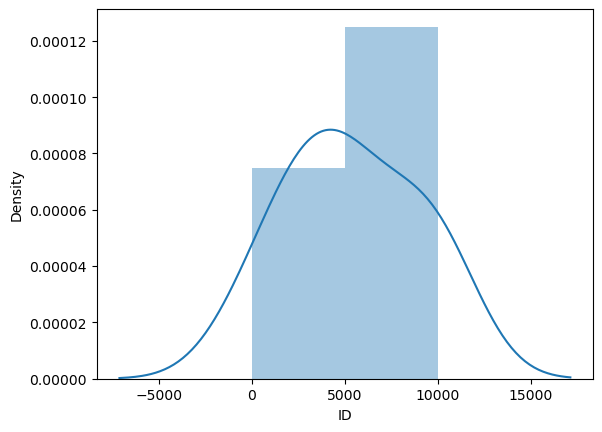

In [9]:
sns.distplot(m1_data['ID'])

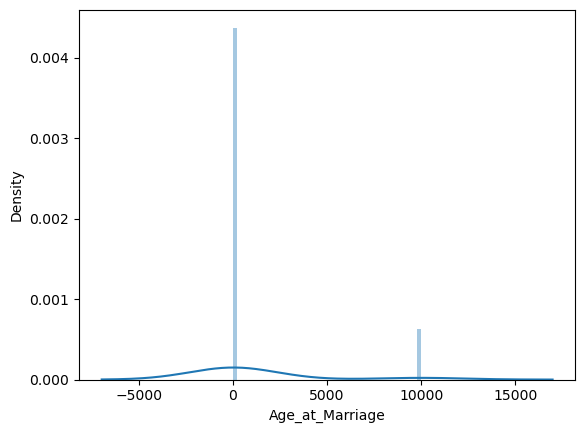

In [10]:
sns.distplot(m1_data['Age_at_Marriage'])
plt.show()

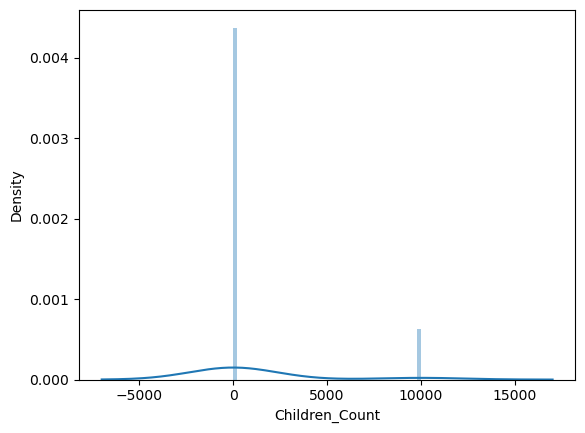

In [11]:
sns.distplot(m1_data['Children_Count'])
plt.show()

<Axes: xlabel='Years_Since_Marriage', ylabel='Density'>

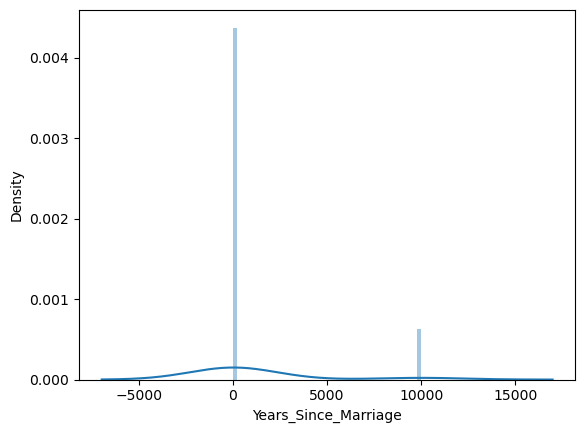

In [12]:
sns.distplot(m1_data['Years_Since_Marriage'])

## work on Age_at_Marriage removing outlier using IQR

<Axes: xlabel='Age_at_Marriage', ylabel='Density'>

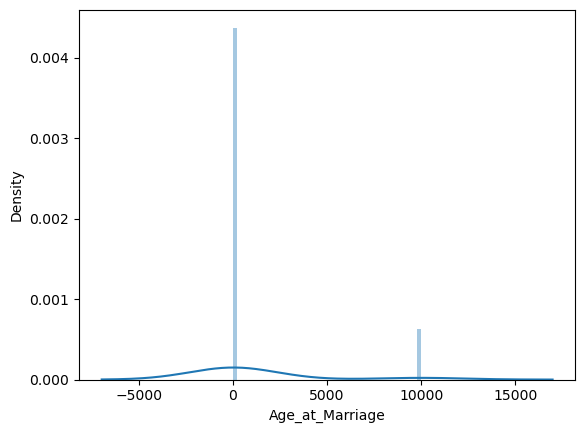

In [13]:
sns.distplot(m1_data['Age_at_Marriage'])

In [14]:
q1=m1_data['Age_at_Marriage'].quantile(0.25)
q3=m1_data['Age_at_Marriage'].quantile(0.75)

In [15]:
q1,q3

(21.75, 35.25)

In [16]:
## quartier range
IQR=q3-q1
IQR

13.5

In [17]:
min_range=q1-(1.5 * IQR)
max_range=q3+(1.5 * IQR)
min_range,max_range

(1.5, 55.5)

In [18]:
Age_at_Marriage_IQR=m1_data[m1_data['Age_at_Marriage']<=max_range]


In [19]:
Age_at_Marriage_IQR.shape , m1_data['Age_at_Marriage'].shape

((7, 4), (8,))

<Axes: xlabel='Age_at_Marriage'>

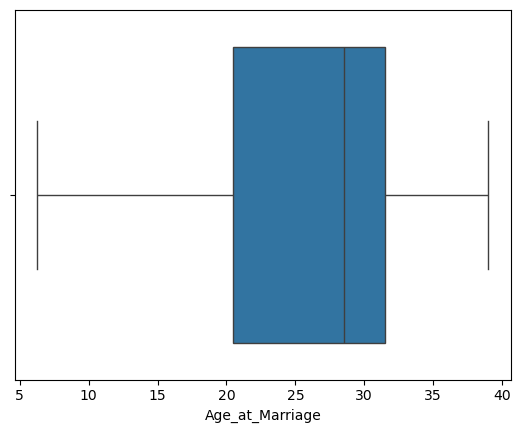

In [20]:
sns.boxplot(x='Age_at_Marriage',data=Age_at_Marriage_IQR)

Text(0.5, 1.0, 'After removing outlier')

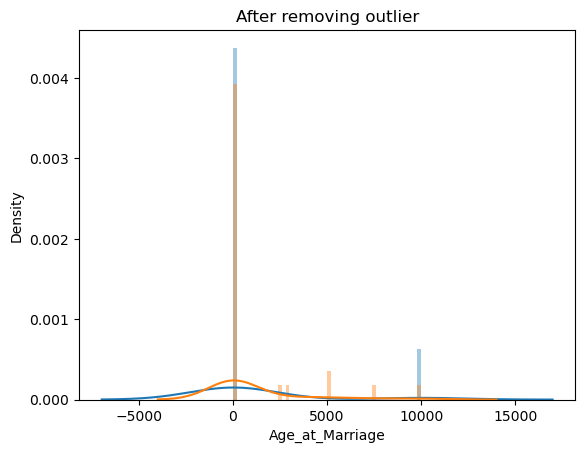

In [21]:
sns.distplot(m1_data['Age_at_Marriage'])
plt.title("Before remoing outlier")

sns.distplot(Age_at_Marriage_IQR)
plt.title('After removing outlier')

## Features Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()
ss.fit(m1_data[['Age_at_Marriage']])

StandardScaler()

In [24]:
marriage_1=pd.DataFrame(ss.transform(m1_data[['Age_at_Marriage']]))
marriage_1

,0
0,2.645741
1,-0.377021
2,-0.383758
3,-0.380205
4,-0.378690
5,-0.376871
6,-0.375355
7,-0.373840


In [25]:
marriage_data['Marriage_Type'].replace('0','Love',inplace=True)
marriage_data['Marriage_Type'].replace('1','Arranged',inplace=True)

<BarContainer object of 10000 artists>

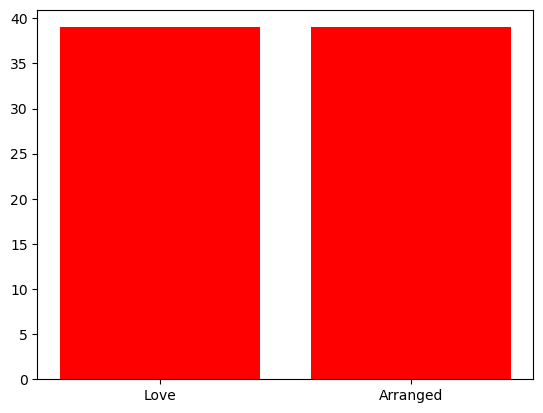

In [26]:
y='Age_at_Marriage'
x='Marriage_Type'
plt.bar(x,y,color='red',data=marriage_data)

## Education wise Marriage

In [27]:
Education=marriage_data['Education_Level'].value_counts()/marriage_data.shape[0]*100
Education

Education_Level
Graduate        39.43
School          30.73
Postgraduate    20.18
PhD              9.66
Name: count, dtype: float64

Text(0.5, 1.0, 'Marriaed with Qualilfication')

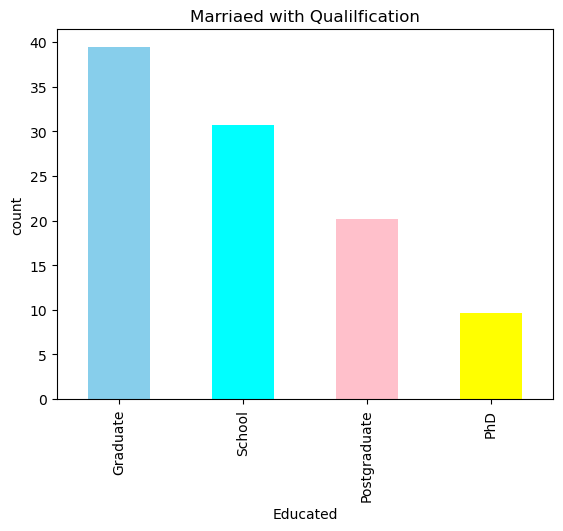

In [28]:
Education.plot(kind="bar",color=["skyblue","aqua","Pink","Yellow"])
plt.xlabel("Educated")
plt.ylabel("count") 
plt.title("Marriaed with Qualilfication")

## Caste marriage

In [29]:
caste=marriage_data['Religion'].value_counts()/marriage_data.shape[0]*100
caste

Religion
Hindu        60.34
Muslim       19.39
Christian     9.90
Others        5.31
Sikh          5.06
Name: count, dtype: float64

Text(0.5, 1.0, 'Marriaed by caste')

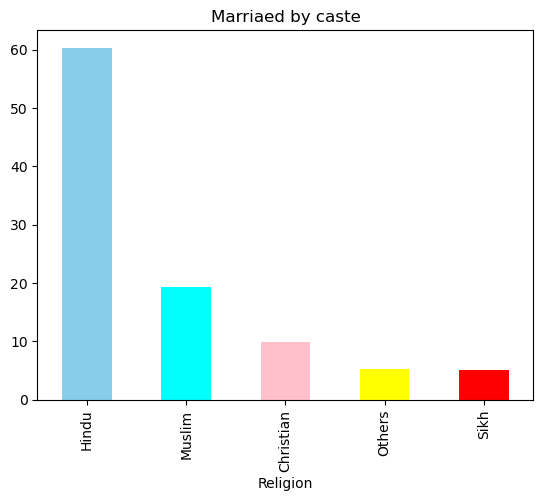

In [30]:
caste.plot(kind="bar",color=["skyblue","aqua","Pink","Yellow",'red'])
plt.title("Marriaed by caste")

## Encoding

In [31]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [32]:
marriage_data.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [33]:
columns_to_ohe = [1, 3, 5, 6, 7, 8, 9,13, 15,16,17]
columns_to_ode=[4,10]
columns_to_ode,columns_to_ohe

([4, 10], [1, 3, 5, 6, 7, 8, 9, 13, 15, 16, 17])

In [34]:
numerical=['Age_at_Marriage','Years_Since_Marriage']
numerical

['Age_at_Marriage', 'Years_Since_Marriage']

In [35]:
marriage_data['Children_Count'].value_counts().sort_index()

Children_Count
0    1590
1    1731
2    1654
3    1698
4    1680
5    1647
Name: count, dtype: int64

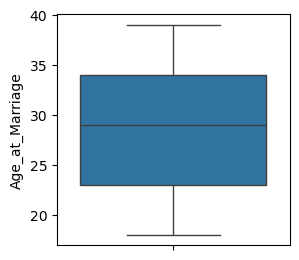

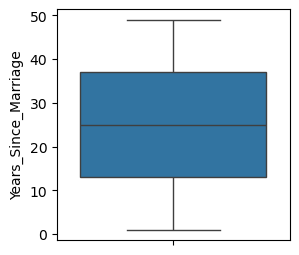

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical:
    plt.figure(figsize=(3,3))
    sns.boxplot(marriage_data[i])
   

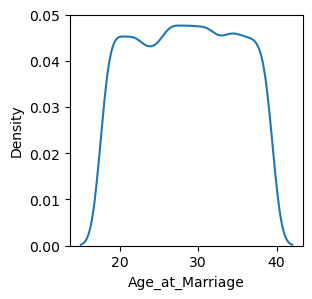

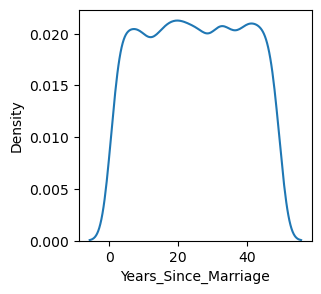

In [37]:
for i in numerical:
    plt.figure(figsize=(3,3))
    sns.kdeplot(marriage_data[i])

## ordinal encoding

In [38]:
categories=[['School','Graduate','Postgraduate','PhD'],['Low','Medium','High']]
categories

[['School', 'Graduate', 'Postgraduate', 'PhD'], ['Low', 'Medium', 'High']]

In [39]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
ode=OrdinalEncoder(categories=categories)


In [40]:
y_original=marriage_data.iloc[:,11]
y_original.head()

0    Yes
1     No
2     No
3     No
4     No
Name: Divorce_Status, dtype: object

In [41]:
from sklearn.compose import ColumnTransformer

In [42]:
transformer = ColumnTransformer([
    ('ohe', ohe, columns_to_ohe),  
    ('ode', ode, columns_to_ode)  
], remainder='passthrough') 

In [43]:
X_n=transformer.fit_transform(marriage_data)
column_names=transformer.get_feature_names_out()
df_transformed = pd.DataFrame(X_n, columns=column_names)

In [44]:
df_transformed.drop(columns=['remainder__Divorce_Status','remainder__ID'],inplace=True)

In [45]:
le=LabelEncoder()
y=le.fit_transform(y_original)
X=df_transformed

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=43)

In [47]:
X_test,X_train

(     ohe__Marriage_Type_Love ohe__Gender_Male ohe__Caste_Match_Same  \
 9415                     0.0              1.0                   1.0   
 6377                     1.0              1.0                   0.0   
 8019                     0.0              0.0                   1.0   
 7754                     0.0              0.0                   1.0   
 4961                     0.0              1.0                   1.0   
 ...                      ...              ...                   ...   
 9363                     0.0              1.0                   1.0   
 9448                     0.0              1.0                   1.0   
 9605                     0.0              1.0                   1.0   
 9486                     0.0              1.0                   0.0   
 3129                     0.0              0.0                   1.0   
 
      ohe__Religion_Hindu ohe__Religion_Muslim ohe__Religion_Others  \
 9415                 1.0                  0.0                 

In [48]:
y_test,y_train

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 1, 0]))

## random forest

In [49]:
model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [50]:
truth=model.predict(X_test)

In [51]:
accuracy=model.score(X_test,y_test)
accuracy

0.897

In [52]:
importances = model.feature_importances_
importances

array([0.03480968, 0.03131109, 0.03025289, 0.0267168 , 0.02009188,
       0.01025122, 0.0104214 , 0.01751053, 0.02399196, 0.03437309,
       0.01591358, 0.03147393, 0.02350617, 0.02807829, 0.03414102,
       0.02652597, 0.0259275 , 0.0692926 , 0.05665279, 0.1602449 ,
       0.09673029, 0.19178242])

In [53]:
feature_names = X_train.columns
feature_names

Index(['ohe__Marriage_Type_Love', 'ohe__Gender_Male', 'ohe__Caste_Match_Same',
       'ohe__Religion_Hindu', 'ohe__Religion_Muslim', 'ohe__Religion_Others',
       'ohe__Religion_Sikh', 'ohe__Parental_Approval_Partial',
       'ohe__Parental_Approval_Yes', 'ohe__Urban_Rural_Urban',
       'ohe__Dowry_Exchanged_Not Disclosed', 'ohe__Dowry_Exchanged_Yes',
       'ohe__Income_Level_Low', 'ohe__Income_Level_Middle',
       'ohe__Spouse_Working_Yes', 'ohe__Inter-Caste_Yes',
       'ohe__Inter-Religion_Yes', 'ode__Education_Level',
       'ode__Marital_Satisfaction', 'remainder__Age_at_Marriage',
       'remainder__Children_Count', 'remainder__Years_Since_Marriage'],
      dtype='object')

In [54]:
importance= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance

,Feature,Importance
0,ohe__Marriage_Type_Love,0.034810
1,ohe__Gender_Male,0.031311
2,ohe__Caste_Match_Same,0.030253
3,ohe__Religion_Hindu,0.026717
4,ohe__Religion_Muslim,0.020092
5,ohe__Religion_Others,0.010251
6,ohe__Religion_Sikh,0.010421
7,ohe__Parental_Approval_Partial,0.017511
8,ohe__Parental_Approval_Yes,0.023992
9,ohe__Urban_Rural_Urban,0.034373


In [55]:
importance = importance.sort_values(by='Importance', ascending=False)
importance

,Feature,Importance
21,remainder__Years_Since_Marriage,0.191782
19,remainder__Age_at_Marriage,0.160245
20,remainder__Children_Count,0.096730
17,ode__Education_Level,0.069293
18,ode__Marital_Satisfaction,0.056653
0,ohe__Marriage_Type_Love,0.034810
9,ohe__Urban_Rural_Urban,0.034373
14,ohe__Spouse_Working_Yes,0.034141
11,ohe__Dowry_Exchanged_Yes,0.031474
1,ohe__Gender_Male,0.031311


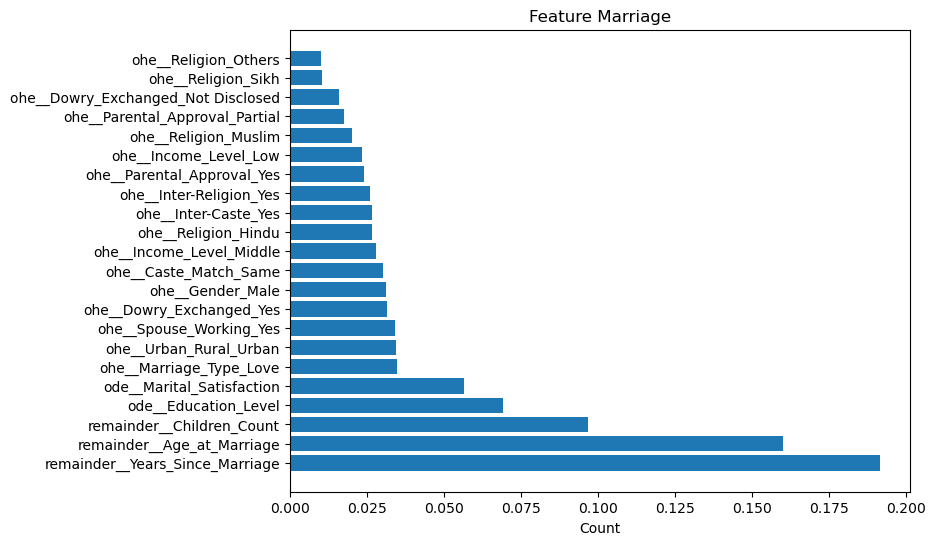

In [56]:
plt.figure(figsize=(8, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Count')
plt.title('Feature Marriage')
plt.show()

In [57]:
marriage_data

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Love,25,Male,Postgraduate,Different,Hindu,Yes,Urban,Not Disclosed,Medium,No,5,Low,38,Yes,No,No
9996,9997,Arranged,31,Female,School,Same,Hindu,Partial,Rural,No,High,No,4,Low,1,No,No,No
9997,9998,Love,22,Male,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,2,Low,24,No,Yes,No
9998,9999,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Urban,No,Medium,No,3,Middle,28,No,No,No


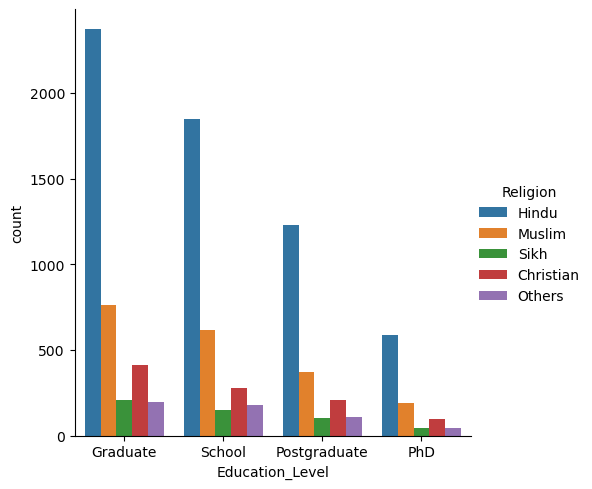

In [88]:
sns.catplot(x='Education_Level',data=marriage_data,kind='count',hue='Religion')

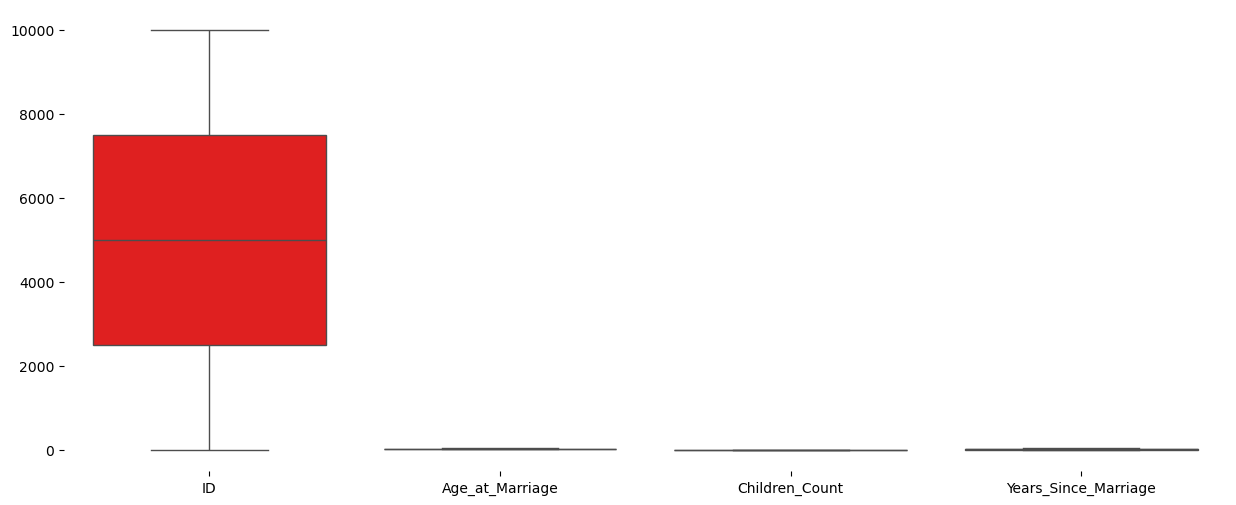

In [89]:
plt.figure(figsize =(15,6))
colors=['red','pink','yellow','orange','green']
sns.boxplot(data=marriage_data, palette=colors )
sns.despine(left=True, bottom=True)
plt.show()

In [92]:
marriage_data.isnull().sum()

ID                      0
Marriage_Type           0
Age_at_Marriage         0
Gender                  0
Education_Level         0
Caste_Match             0
Religion                0
Parental_Approval       0
Urban_Rural             0
Dowry_Exchanged         0
Marital_Satisfaction    0
Divorce_Status          0
Children_Count          0
Income_Level            0
Years_Since_Marriage    0
Spouse_Working          0
Inter-Caste             0
Inter-Religion          0
dtype: int64

In [93]:
marriage_data.value_counts()

ID     Marriage_Type  Age_at_Marriage  Gender  Education_Level  Caste_Match  Religion  Parental_Approval  Urban_Rural  Dowry_Exchanged  Marital_Satisfaction  Divorce_Status  Children_Count  Income_Level  Years_Since_Marriage  Spouse_Working  Inter-Caste  Inter-Religion
1      Love           23               Male    Graduate         Different    Hindu     No                 Urban        No               Medium                Yes             5               Middle        34                    No              No           No                1
6671   Arranged       25               Female  School           Different    Hindu     Yes                Rural        No               Medium                No              3               Middle        2                     Yes             No           No                1
6664   Arranged       38               Female  School           Same         Hindu     No                 Rural        Yes              Low                   No              3     

<Figure size 1200x600 with 0 Axes>

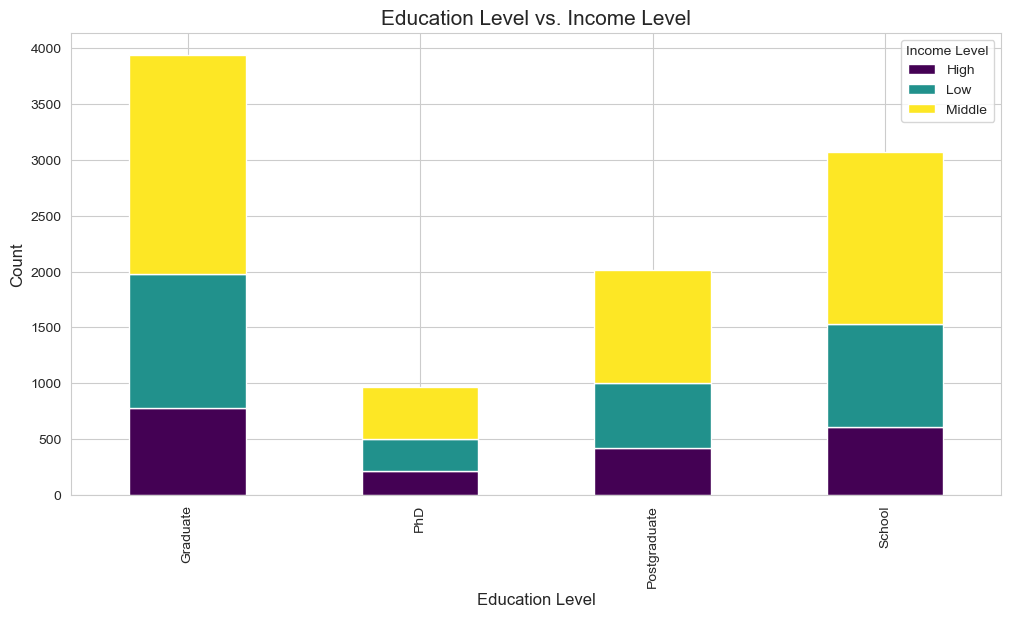

In [104]:

plt.figure(figsize=(12, 6))
income_education = pd.crosstab(marriage_data['Education_Level'], marriage_data['Income_Level'])
income_education.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Education Level vs. Income Level", fontsize=15)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Income Level")
plt.show()

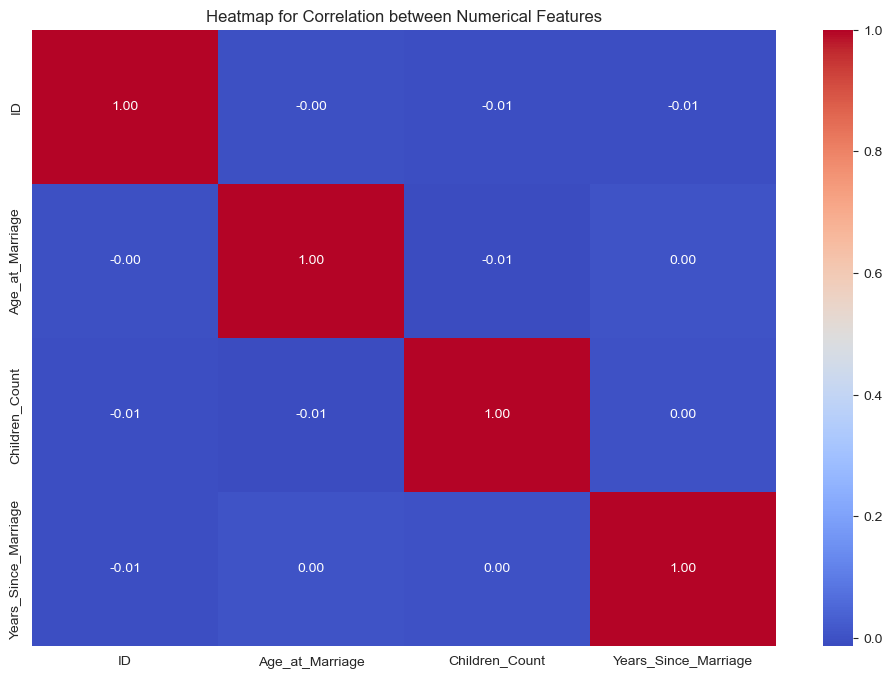

In [99]:
plt.figure(figsize=(12, 8))
corr = marriage_data.corr(numeric_only=True) 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap for Correlation between Numerical Features")
plt.show()

<Figure size 1000x1000 with 0 Axes>

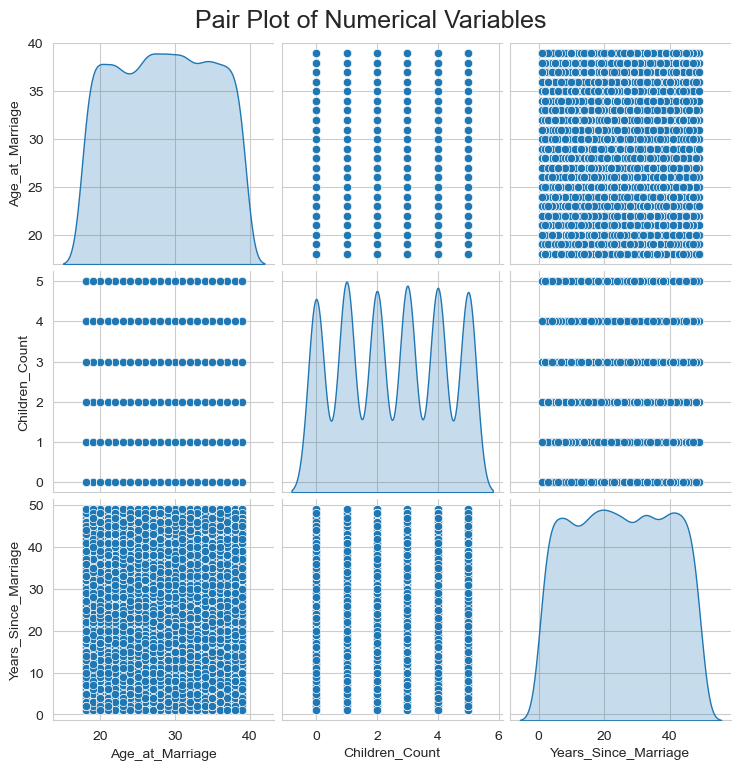

In [102]:
plt.figure(figsize=(10, 10))
sns.pairplot(marriage_data[['Age_at_Marriage', 'Children_Count', 'Years_Since_Marriage']], kind='scatter', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02, fontsize=18)
plt.show()